# Chapter 2 練習と総合問題解答

In [1]:
# 以下のモジュールを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

# 2 Numpy、Scipy、Pandas、Matplotlibの基礎

## 2.1 Numpy、Scipy、Pandas、Matpltolibの基礎
ゴール：Numpy、Scipy、Pandas、matplotlibのモジュールを読み込みそれらの基本的な役割を知る

### 2.1.1 Numpyの基礎

#### <練習問題 1>

1から50までの自然数の和を計算して、最後の計算結果を表示させるプログラムを書いてください。ただし、numpyを使ってください。

In [2]:
# 解答
import numpy as np

numpy_sample_data = np.array([i for i in range(1,51)])
print(numpy_sample_data.sum())

1275


#### <練習問題 2>

標準正規分布に従う乱数を10個発生させて配列を作成してください。また、その中での最小値、最大値、合計を求めるプログラムを書いてください。

In [4]:
# 解答 
# 乱数の発生のためのモジュール読み込み
import numpy.random as random

# seedを設定することで乱数を固定化することができる
random.seed(0)

# 標準正規分布（平均０、分散１の正規分布）の乱数を10個発生
norm_random_sample_data = random.randn(10)

print("最小値：",norm_random_sample_data.min())
print("最大値：",norm_random_sample_data.max())
print("合計：",norm_random_sample_data.sum())

最小値： -0.977277879876
最大値： 2.2408931992
合計： 7.38023170729


#### <練習問題 3>

要素がすべて3の5行5列の行列を作成し、その行列の2乗をする計算をしてみましょう。

In [5]:
# 解答 
import numpy as np

matrix_data1 =  np.ones((5,5),dtype='i') * 3

print(matrix_data1.dot(matrix_data1))

[[45 45 45 45 45]
 [45 45 45 45 45]
 [45 45 45 45 45]
 [45 45 45 45 45]
 [45 45 45 45 45]]


### 2.1.2 Scipyの基礎

#### <練習問題 1>

以下の行列について、行列式を求めてください。

$
  A = \left(
    \begin{array}{ccc}
      1 & 2 & 3 \\
      1 & 3 & 2 \\
      3 & 1 & 2
    \end{array}
  \right)
$

In [6]:
# 解答
a_matrix_data = np.array([[1,2,3],[1,3,2],[3,1,2]])

print(np.linalg.det(a_matrix_data))

-12.0


#### <練習問題 2>

上と同じ行列について、逆行列と固有値及び固有ベクトルを求めてください。

In [8]:
# 解答
import scipy.linalg as linalg

a_matrix_data = np.array([[1,2,3],[1,3,2],[3,1,2]])

# 逆行列
print("逆行列")
print(linalg.inv(a_matrix_data))

# 固有値と固有ベクトル
eig_value, eig_vector = linalg.eig(a_matrix_data)

print("固有値")
print(eig_value)
print("固有ベクトル")
print(eig_vector)

逆行列
[[-0.333  0.083  0.417]
 [-0.333  0.583 -0.083]
 [ 0.667 -0.417 -0.083]]
固有値
[ 6.000+0.j -1.414+0.j  1.414+0.j]
固有ベクトル
[[-0.577 -0.722  0.16 ]
 [-0.577 -0.143 -0.811]
 [-0.577  0.677  0.563]]


#### <練習問題 3>

以下の関数が0となる解を求めてみましょう。

\begin{eqnarray}
f(x) = x^3 + 2x+ 1
\end{eqnarray}

In [9]:
# 解答
from scipy.optimize import newton

# 関数の定義
def sample_function1(x):
    return (x**3+ 2*x + 1)

# 計算実行
print(newton(sample_function1,0))

# 確認
print(sample_function1(newton(sample_function1,0)))

-0.4533976515164037
1.1102230246251565e-16


### 2.1.3 Pandasの基礎

#### <練習問題 1>

以下のデータに対して、Moneyが500以上の人を絞り込んで、レコードを表示させてください。

In [10]:
from pandas import Series,DataFrame
import pandas as pd

attri_data1 = {'ID':['1','2','3','4','5']
        ,'sex':['F','F','M','M','F']
        ,'Money':[1000,2000,500,300,700]
        ,'name':['Saito','Horie','Kondo','Kawada','Matsubara']}

attri_data_frame1 = DataFrame(attri_data1)

In [11]:
# 解答
attri_data_frame1[attri_data_frame1.Money>=500]

,ID,Money,name,sex
0,1,1000,Saito,F
1,2,2000,Horie,F
2,3,500,Kondo,M
4,5,700,Matsubara,F


#### <練習問題 2>

上記のデータに対して、男女別（MF別）の平均Moneyを求めてください。

In [12]:
# 解答
attri_data_frame1.groupby("sex")["Money"].mean()

sex
F    1233.333333
M     400.000000
Name: Money, dtype: float64

#### <練習問題 3>

上記のデータに対して、以下のデータの同じIDをキーとして、データをマージしてください。そして、MoneyとMathとEnglishの平均を求めてください。

In [13]:
attri_data2 = {'ID':['3','4','7']
        ,'Math':[60,30,40]
        ,'English':[80,20,30]}

attri_data_frame2 = DataFrame(attri_data2)

In [14]:
# 解答
merge_data = attri_data_frame1.merge(attri_data_frame2)
merge_data.mean()

ID          17.0
Money      400.0
English     50.0
Math        45.0
dtype: float64

### 2.1.4 Matplotlibの基礎

#### <練習問題 1>

y = 5x + 3 (xは-10から10の値)のグラフを書いてみましょう。

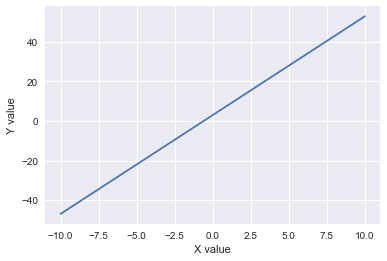

In [13]:
x = np.linspace(-10, 10,100)
plt.plot(x, 5*x+3)
plt.xlabel("X value")
plt.ylabel("Y value")
plt.grid(True)

#### <練習問題 2>

先ほどのsin関数に加えて、cos関数のグラフも書いてください。

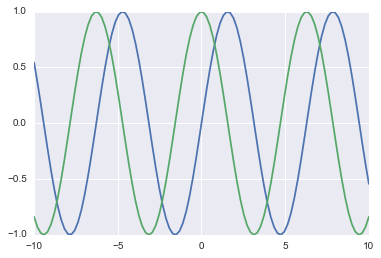

In [17]:
# 解答
# matplotlib と seabonの読み込み
# seabornはきれいに図示できる
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# jupyter notebookでグラフを表示させるために必要なマジック
%matplotlib inline

import numpy as np

x = np.linspace(-10, 10,100)
plt.plot(x, np.sin(x)) 
plt.plot(x, np.cos(x)) 

plt.grid(True)

#### <練習問題 3>

0から1の値をとる一様乱数を1000個、2組発生させて、それぞれのヒストグラムを書いてみましょう。なお、それぞれのヒストグラムを別のグラフに表示するために、plt.subplotを利用してください。結果はどうなっていますか。(ここで一様乱数とは、ある数から別のある数まで等確率で発生する乱数のことをいい、np.random.uniformを使います。例えば、0から1までの数を10個発生させる場合は、np.random.uniform(0.0, 1.0, 10)とします。)

また、1000個だけではなく、100個や10000個などでも実施してみましょう。何かわかることはありますか。

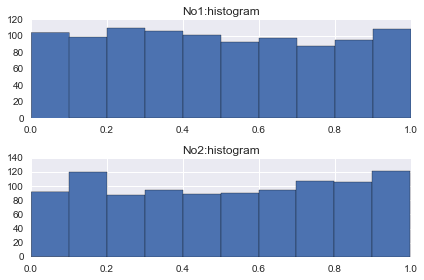

In [18]:
# 解答
import numpy as np
import math

# 解答 
def uni_hist(N):
    # 一様乱数の発生
    x = np.random.uniform(0.0, 1.0, N)
    y = np.random.uniform(0.0, 1.0, N)

    plt.subplot(2, 1, 1)
    plt.hist(x)
    plt.title("No1:histogram")

    plt.subplot(2, 1, 2)
    plt.hist(y)
    plt.title("No2:histogram")

    plt.grid(True)

    #タイトルの被りを防ぐ
    plt.tight_layout()

uni_hist(1000)

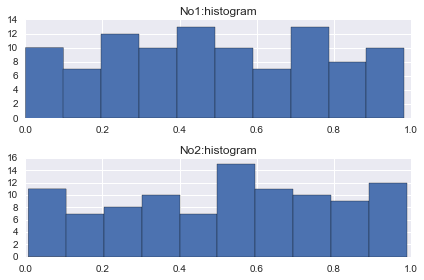

In [19]:
# N=100
uni_hist(100)

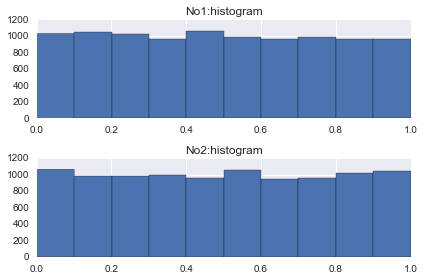

In [20]:
# N = 10000
uni_hist(10000)

## 2.2 総合問題

### 2.2.1 モンテカルロ法

乱数を発生させる方法を使って、円周率を求めるプログラムを作成してみましょう。（このアプローチを**モンテカルロ法**といいます）

（1）一様分布に従う乱数を10,000個、2組発生させてみましょう。

（2）x−y軸を使った中心(0,0)、半径1の円と、長さ1の正方形を考えます。この時、円の面積は$\pi$となり、正方形の面積は1となります。ここで先ほどのxとyの組み合わせの乱数10000個のうち、円の内部に入る点は何組あるでしょうか。ここで、円の内部に入るとは、x−y座標の原点から点 (x, y) のベクトルの長さを求め、それが1より小さくなるかどうかを判定基準とします。なお、その長さを求めるためにはユークリッドノルム($\sqrt{x^2 + y^2}$)を使います。これは math.hypot(x,y)で計算することができます。（さらに、余裕があれば、円の中に入ったxとyの組み合わせと外に出たxとyの組み合わせをプロットして図にしてみましょう。）

（3）半径1の1/4の円の面積と長さ1の長方形の面積の比は、$\pi/4 : 1$となりますので、これと先ほどの結果を利用して、円周率を求めてみましょう。

In [21]:
# 解答
import numpy as np
import math

# 解答 (1)
N = 10**4

# 一様乱数の発生
x = np.random.uniform(0.0, 1.0, N)
y = np.random.uniform(0.0, 1.0, N)

# 円の中に入ったxとy
inside_x = []
inside_y = []

# 円の外に出たxとy
outside_x = []
outside_y = []

# 解答 (2)
count_inside = 0
for count in range(0, N):
    d = math.hypot(x[count],y[count])
    if d < 1:
        count_inside += 1
        # 円の内部に入った時のxとyの組み合わせ
        # appendはリストに要素を追加するメソッド
        inside_x.append(x[count])
        inside_y.append(y[count])
    else:
        # 円の外に出た時のxとyの組み合わせ
        outside_x.append(x[count])
        outside_y.append(y[count])
    
print("円の内部に入った数:",count_inside)

# 解答 (3)
print ("円周率の近似値:",4.0 * count_inside / N)

円の内部に入った数: 7872
円周率の近似値: 3.1488


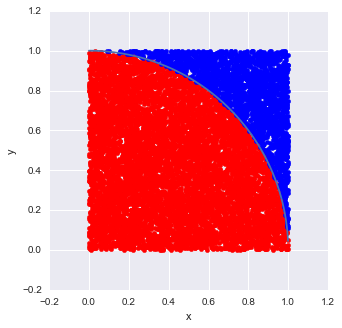

In [22]:
# 参考：（2）
# 図のサイズ
plt.figure(figsize=(5,5))

# 円を描くためのデータ
circle_x = np.arange(0,1,0.001)
circle_y = np.sqrt(1- circle_x * circle_x)

# 円を描く
plt.plot(circle_x, circle_y) 

# 円の中に入っているのが、red
plt.scatter(inside_x,inside_y,color="r")
# 円の外に出たのが、blue
plt.scatter(outside_x,outside_y,color="b")

plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

参考URL:http://program-study.hatenablog.com/entry/2016/01/06/200359